In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL

In [2]:
dir = 'D:\datasets\cell_images\cell_images'

In [3]:
categories = os.listdir(dir)
categories

['test', 'train']

In [4]:
test_classes = os.listdir(dir + "\\" + categories[0])
train_classes = os.listdir(dir + "\\" + categories[1])
train_classes

['parasitized', 'uninfected']

In [5]:
parasite_trainimg_list = os.listdir(dir+'\\'+categories[1]+'\\'+train_classes[0])
parasite_testimg_list = os.listdir(dir+'\\'+categories[0]+'\\'+test_classes[0])
# parasite_img_list

In [6]:
uninfected_trainimg_list = os.listdir(dir + "\\" + categories[1]+'\\'+train_classes[1])
uninfected_testimg_list = os.listdir(dir + "\\" + categories[0]+'\\'+train_classes[1])

In [7]:
len(parasite_testimg_list)

1300

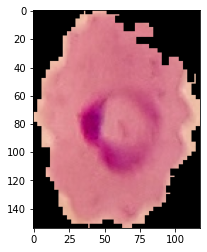

In [8]:
from PIL import Image
img = Image.open(r"D:\datasets\cell_images\cell_images\test\parasitized\C37BP2_thinF_IMG_20150620_133111a_cell_87.png")
plt.imshow(img)

In [9]:
import matplotlib.image as image

In [47]:
img_data = []
label = []
train_para = "D:\\datasets\\cell_images\\cell_images\\train\\parasitized"
train_para_img_list = os.listdir(train_para)

for i in train_para_img_list:
    each_img_path = train_para + '\\'+i
    if i.endswith('.png'):
        img = cv2.imread(each_img_path)
#         img = Image.fromarray(img,'RGB')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = Image.fromarray(img,'L')
        img=img.resize((30,30))
        img_data.append(np.array(img))
        label.append(1)

In [49]:
k =img_data[0]
k = k.reshape(30,30,1)
k.ndim

3

In [48]:
train_uninfect = "D:\\datasets\\cell_images\\cell_images\\train\\uninfected"
train_uninfect_img_list = os.listdir(train_uninfect)
for i in train_uninfect_img_list:
    each_img_path = train_uninfect + '\\'+i
    if i.endswith('.png'):
        img = cv2.imread(each_img_path)
#         img = Image.fromarray(img,'RGB')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = Image.fromarray(img,'L')
        img=img.resize((30,30))
        img_data.append(np.array(img))
        label.append(0)

In [50]:
test_para = "D:\\datasets\\cell_images\\cell_images\\test\\parasitized"
test_para_img_list = os.listdir(test_para)
for i in test_para_img_list:
    each_img_path = test_para + '\\'+i
    if i.endswith('.png'):
        img = cv2.imread(each_img_path)
#         img = Image.fromarray(img,'RGB')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = Image.fromarray(img,'L')
        img=img.resize((30,30))
        img_data.append(np.array(img))
        label.append(1)

In [51]:
test_uninfect = "D:\\datasets\\cell_images\\cell_images\\test\\uninfected"
test_uninfect_img_list = os.listdir(test_uninfect)
for i in test_uninfect_img_list:
    each_img_path = test_uninfect + '\\'+i
    if i.endswith('.png'):
        img = cv2.imread(each_img_path)
#         img = Image.fromarray(img,'RGB')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = Image.fromarray(img,'L')
        img=img.resize((30,30))
        img_data.append(np.array(img))
        label.append(0)

In [52]:
img_data1 = []
for i in img_data:
    k = i.reshape(30,30,1)
    img_data1.append(k)

In [53]:
img_data1[0].shape

(30, 30, 1)

In [55]:
len(img_data1)

27558

In [56]:
img_data1 = np.array(img_data1,dtype=np.float32)

In [57]:
img_data1.shape

(27558, 30, 30, 1)

In [58]:
label = np.array(label,dtype=np.int32)

In [59]:
label.shape

(27558,)

In [60]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test = train_test_split(img_data1,label,test_size=0.2,random_state=50)

In [71]:
y_train.shape

(22046,)

In [72]:
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Conv2D , MaxPool2D
from tensorflow.keras.layers import Flatten

In [73]:
from keras.applications import ResNet50
from keras.applications import imagenet_utils
from keras.models import Model

In [74]:
from keras import optimizers
from keras.optimizers import Adam

In [96]:
model = Sequential()
model.add(Conv2D(30,kernel_size = (3,3),input_shape=(30,30,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(30,kernel_size = (3,3),input_shape=(30,30,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(240,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(60,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 30)        8130      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 30)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1080)              0         
                                                                 
 dense_16 (Dense)            (None, 120)              

In [77]:
from tensorflow.keras.callbacks import EarlyStopping

In [91]:
early_stop = EarlyStopping(monitor='accuracy',patience=5)

In [92]:
x_train = x_train[:10000]
y_train =y_train[:10000]
x_test = x_test[:2000]
y_test = y_test[:2000]

In [93]:
x_train =x_train.reshape(10000,30,30,1)
x_train.ndim

4

In [98]:
model.fit(x_train,y_train,epochs=35,validation_data=(x_test,y_test),batch_size=50,steps_per_epoch= len(x_train)//42,callbacks=[early_stop])

Epoch 1/35
238/238 [==============================] - 19s 61ms/step - loss: 0.8876 - accuracy: 0.5792 - val_loss: 0.6451 - val_accuracy: 0.6000
Epoch 2/35
238/238 [==============================] - 14s 59ms/step - loss: 0.6081 - accuracy: 0.6625 - val_loss: 0.7618 - val_accuracy: 0.5745
Epoch 3/35
238/238 [==============================] - 15s 63ms/step - loss: 0.5101 - accuracy: 0.7380 - val_loss: 0.3590 - val_accuracy: 0.8490
Epoch 4/35
238/238 [==============================] - 15s 62ms/step - loss: 0.2889 - accuracy: 0.8816 - val_loss: 0.2562 - val_accuracy: 0.8965
Epoch 5/35
238/238 [==============================] - 14s 59ms/step - loss: 0.1978 - accuracy: 0.9259 - val_loss: 0.2163 - val_accuracy: 0.9150
Epoch 6/35
238/238 [==============================] - 14s 60ms/step - loss: 0.1584 - accuracy: 0.9422 - val_loss: 0.2229 - val_accuracy: 0.9175
Epoch 7/35
238/238 [==============================] - 15s 61ms/step - loss: 0.1472 - accuracy: 0.9451 - val_loss: 0.2410 - val_accuracy:

In [99]:
pred = model.predict(x_test)

63/63 [==============================] - 1s 15ms/step


In [100]:
y_pred = []
for i in pred:
    if i <=0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [104]:
y_pred[:10]

[0, 1, 0, 1, 1, 0, 0, 1, 1, 0]

In [105]:
y_test[:10]

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0])

In [106]:
from sklearn.metrics import accuracy_score

In [108]:
a = accuracy_score(y_test,y_pred)
a

0.9275

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1007
           1       0.94      0.91      0.93       993

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [126]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[947  60]
 [ 85 908]]


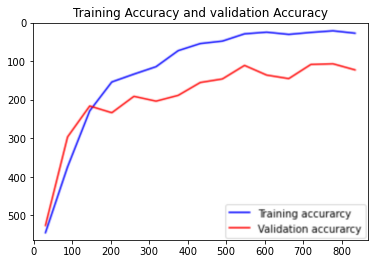

In [162]:
metrics = pd.DataFrame(model.history.history)
met =metrics[['accuracy','val_accuracy']]
plt.title('Training Accuracy and Validation Accuracy')
plt.plot(met)